<a href="https://colab.research.google.com/github/utkarsh-1912/ML_Works/blob/main/Seismic_Analysis_for_Mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Seismic Analysis for Mine
---
Dataset Src:  [Seismic Hazard Data](https://archive.ics.uci.edu/ml/datasets/seismic-bumps)

---
Attribute information:
1. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic
method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method;
3. shift: information about type of a shift (W - coal-getting, N -preparation shift);
4. genergy: seismic energy recorded within previous shift by the most active geophone (GMax) out of
geophones monitoring the longwall;
5. gpuls: a number of pulses recorded within previous shift by GMax;
6. gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded
during eight previous shifts;
7. gdpuls: a deviation of a number of pulses recorded within previous shift by GMax from average number
of pulses recorded during eight previous shifts;
8. ghazard: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method based on registration coming form GMax only;
9. nbumps: the number of seismic bumps recorded within previous shift;
10. nbumps2: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. nbumps3: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. nbumps4: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. nbumps5: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. nbumps6: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. nbumps7: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. nbumps89: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. energy: total energy of seismic bumps registered within previous shift;
18. maxenergy: the maximum energy of the seismic bumps registered within previous shift;
19. class: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift
('non-hazardous state').

---

`Importing Modules`

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Loading Dataset

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/seismic-analysis_mine.csv")
df.head()

,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,1,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,2,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,3,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,4,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,5,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2584, 20)

In [ ]:
df.describe()

,id,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,1292.500000,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,746.080871,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,646.750000,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,1292.500000,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,1938.250000,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2584.000000,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2584 non-null   int64 
 1   seismic         2584 non-null   object
 2   seismoacoustic  2584 non-null   object
 3   shift           2584 non-null   object
 4   genergy         2584 non-null   int64 
 5   gpuls           2584 non-null   int64 
 6   gdenergy        2584 non-null   int64 
 7   gdpuls          2584 non-null   int64 
 8   ghazard         2584 non-null   object
 9   nbumps          2584 non-null   int64 
 10  nbumps2         2584 non-null   int64 
 11  nbumps3         2584 non-null   int64 
 12  nbumps4         2584 non-null   int64 
 13  nbumps5         2584 non-null   int64 
 14  nbumps6         2584 non-null   int64 
 15  nbumps7         2584 non-null   int64 
 16  nbumps89        2584 non-null   int64 
 17  energy          2584 non-null   int64 
 18  maxenerg

Data Preprocessing

In [ ]:
df.isnull().sum()

id                0
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['seismic','seismoacoustic','ghazard','shift']


In [ ]:
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# df['seismic'].str.strip()
# df['seismoacoustic'].str.strip()
# df['ghazard'].str.strip()
# df['shift'].str.strip()

In [ ]:
df['seismic'] = df["seismic"].fillna(df['seismic'].mode()[0])# mode is used there
df['seismoacoustic'] = df["seismoacoustic"].fillna(df['seismoacoustic'].mode()[0])
df['shift'] = df["shift"].fillna(df['shift'].mode()[0])
df['ghazard'] = df["ghazard"].fillna(df['ghazard'].mode()[0])

In [ ]:
df.isnull().sum()

id                0
seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

In [ ]:
df.head()

,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,1,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,0
2,3,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,0
4,5,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='energy', ylabel='Density'>

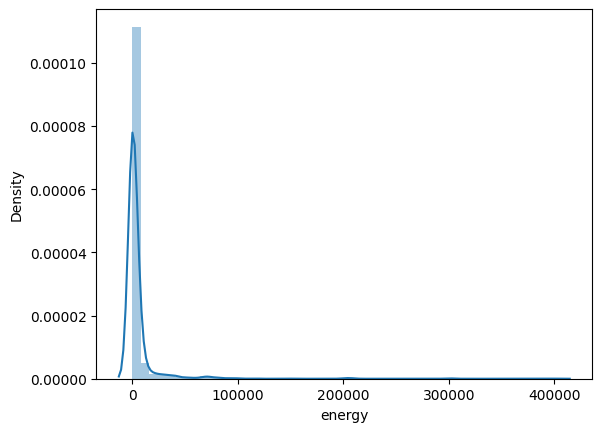

In [ ]:
sns.distplot(df['energy'])

In [ ]:
# df['energy'] = np.log(df['energy'])
# sns.distplot(df['energy'])

<Axes: >

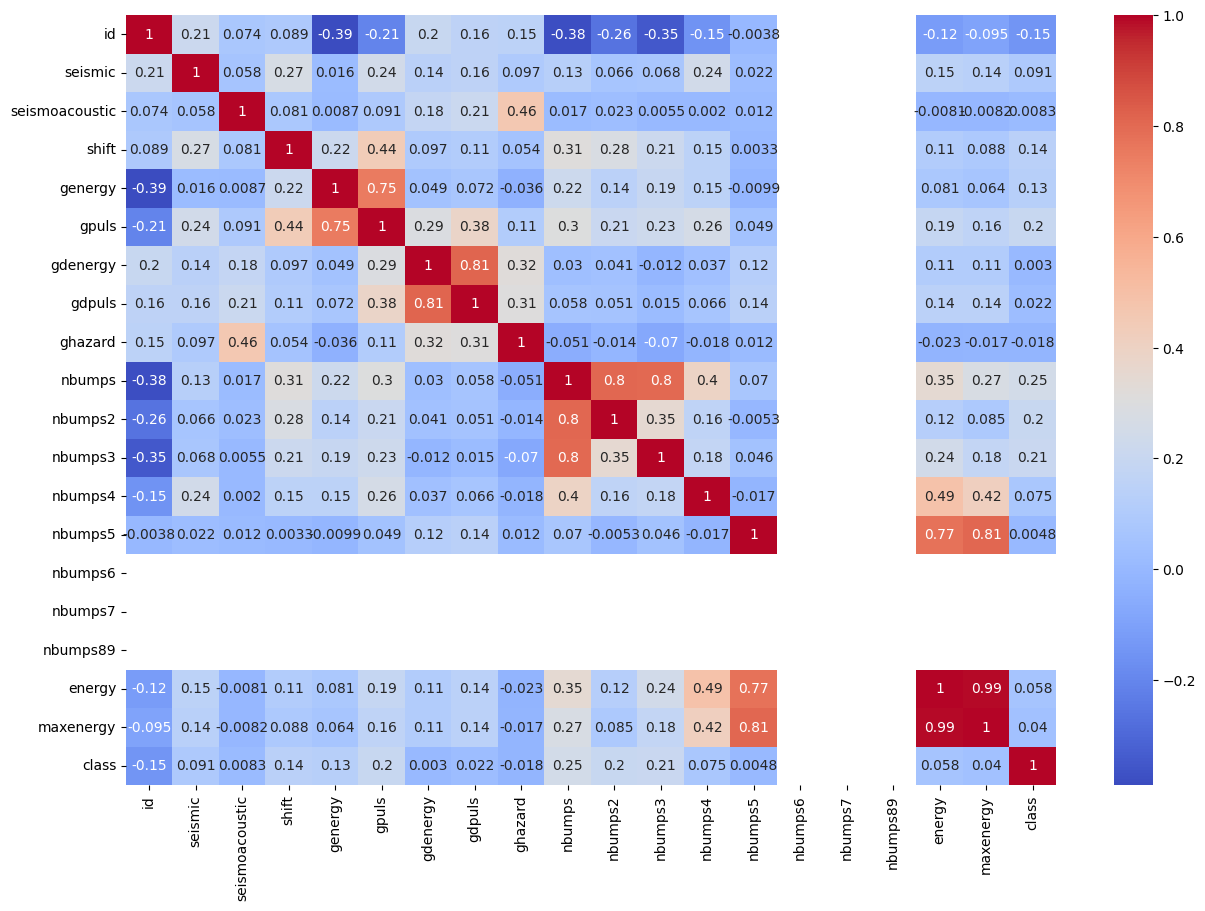

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="coolwarm")

As there is no bumps with magnitude higher than 10^6. So, Delete those columns

In [ ]:
df = df.drop(['nbumps6','nbumps7','nbumps89'],axis=1)

<Axes: >

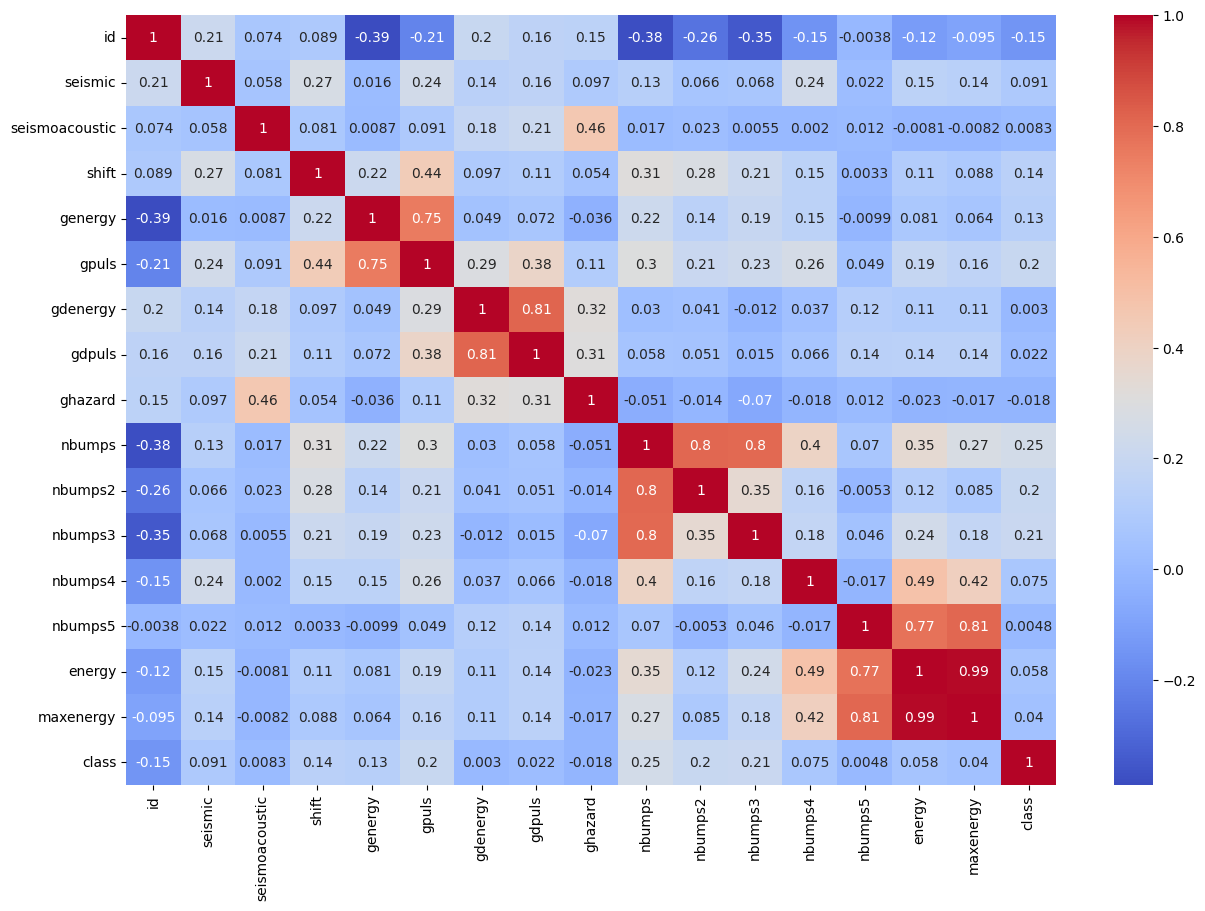

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="coolwarm")

In [ ]:
df.shape

(2584, 17)

In [ ]:
X = df.drop(columns=['class'], axis=1)# you can also do slicing
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy : ", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation : ",np.mean(score)*100)

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy :  88.85448916408669
Cross validation :  44.67822710029538


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy :  92.41486068111455
Cross validation :  85.52936590046933


In [ ]:
def predOutput():
    id = 1
    seismic = ord(input('seismic state:- a/b/c/d"(a - lack of hazard, b - low hazard, c - high hazard, d - danger state)": '))-65
    seismoacoustic = ord(input('Seismoacoustic:- a/b/c: '))-65
    kshift = input('shift state:- W/N"(W - coal-getting, N -preparation shift)": ')
    genergy= float(input('genergy value: '))
    gpuls=float(input('gpuls value: '))
    gdenergy= float(input('gdenergy value"<0": '))
    gdpuls=float(input('gdpuls value: '))
    ghazard=ord(input('ghazard value: '))-65
    nbumps=float(input('nbumps value: '))
    nbumps2=float(input('nbumps2 value: '))
    nbumps3=float(input('nbumps3 value: '))
    nbumps4=float(input('nbumps4 value: '))
    nbumps5=float(input('nbumps5 value: '))
    energy=float(input('energy value: '))
    maxenergy=float(input('Max Energy received: '))
    shift = 1
    if(kshift=='W'):
        shift = 0

    iData = [
        id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
        ]
    idf = pd.DataFrame(iData).T
#     Logistic Regression
    model = LogisticRegression()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print(idf)
    odf = model.predict(idf)
    if(odf==0):
        return "Non-Hazardous"
    return "Hazardous"

In [ ]:
predOutput()